# Enhancing Portfolio Selection with Ensemble Learning Methods

Supervised by: Prof. Daniel P. Palomar\
Group members: Lam Sze Yin Cecilia, Lee Adwin Richie, Pong Ka Ming


## Main

In [1]:
# Import packages
from helperClass.genericfunction import *
from helperClass.stockdata import StockData
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Fix seed for comparability and reproducability
random.seed(99)

# Create StockData object
Stock_Data = StockData()

# Set period
Stock_Data.train_start = "2020-01-01"
Stock_Data.train_end = "2022-12-31"
Stock_Data.test_end = "2023-04-01"

In [3]:
# Initialize
gf = GenericFunction(Stock_Data)

In [4]:
# Reset database (Optional) 
database.reset_table("Weights")
database.reset_table("Details")

# Try gf.methods_metrics

In [5]:
# Set necessary properties
gf.set_disable_tqdm(False) # Optional
gf.boot_properties = 1
gf.set_ssr_properties(10,10)
gf.set_ensemble_properties(10,100,10,100)
gf.set_n_day_rebalance(31)

# Perform strategy
gf.methods_metrics("ssr_mvp")

2it [00:00, 16.82it/s]

Run details have been saved.
s = 10, b = 10 || return: 0.0775443628057011, sharpe: 1.6677776366911794, Volatility: 0.1933436811352218, Turnover Rate: 0.026560484798260658, Maximum Drawdown: 0.10113503012571468


# Try gf.plot_histogram

Same period

100%|██████████| 30/30 [00:05<00:00,  5.81it/s]


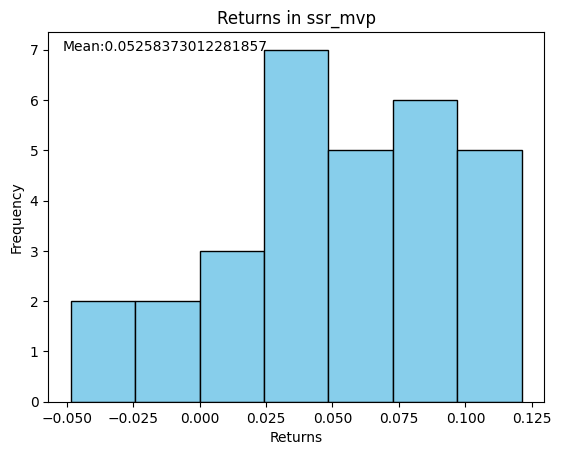

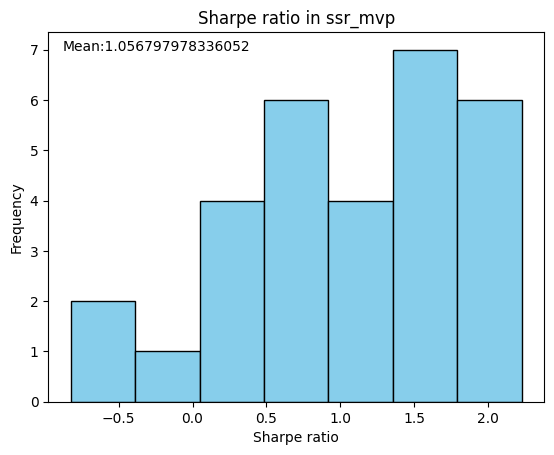

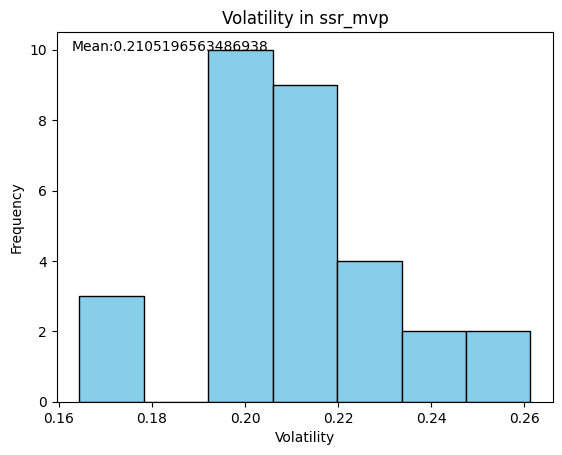

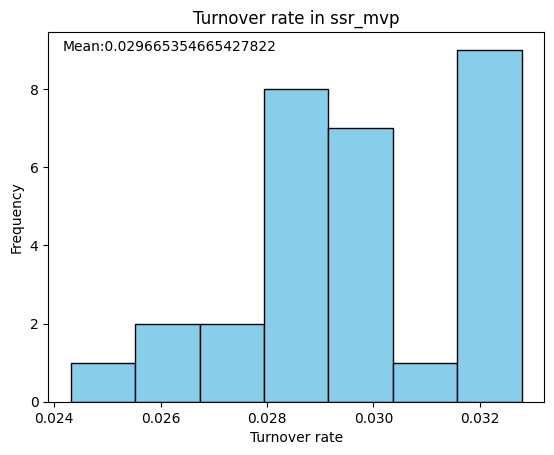

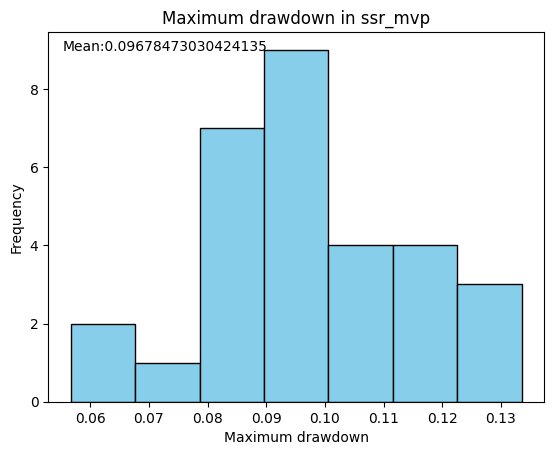

In [5]:
# Initialize
gf = GenericFunction(Stock_Data)

# Set necessary properties
gf.set_disable_tqdm(True)
gf.boot_properties = 1
gf.set_ssr_properties(10,10)
gf.set_ensemble_properties(1,5,1,5)
gf.set_n_day_rebalance(31)

# Perform strategy
gf.plot_histogram("ssr_mvp",30,False)

# Try gf.plot_random_time

100%|██████████| 30/30 [00:03<00:00,  8.39it/s]


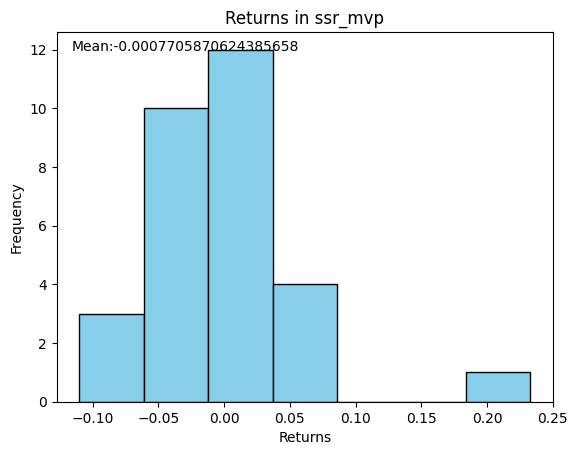

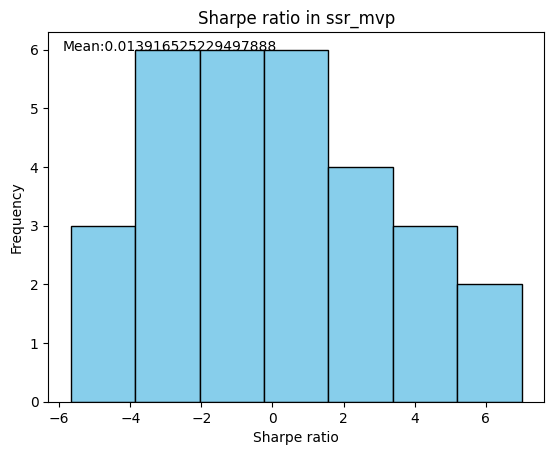

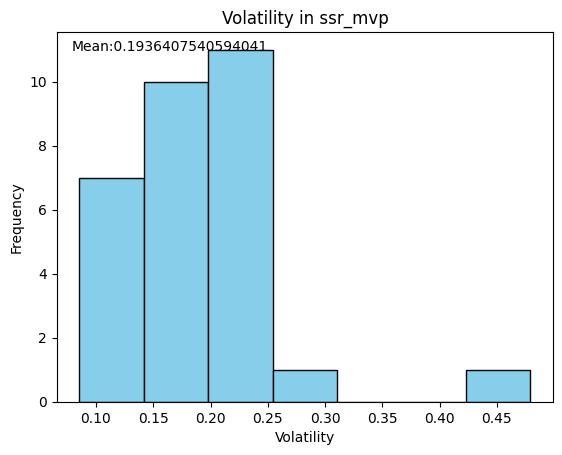

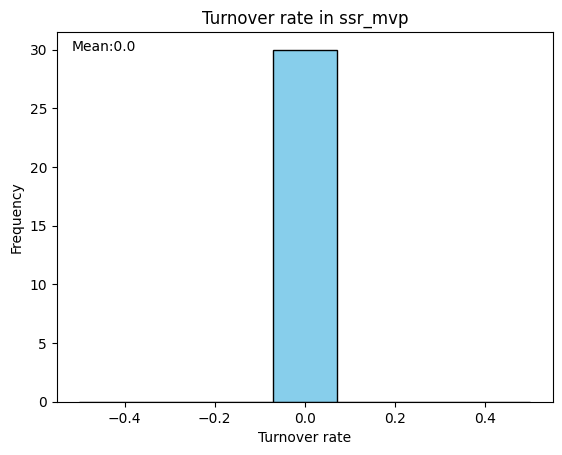

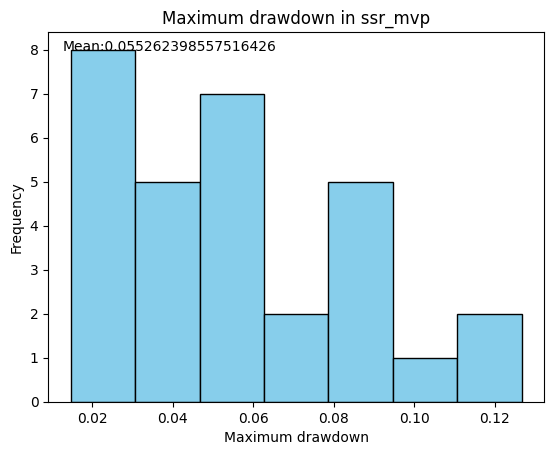

In [6]:
gf = GenericFunction(Stock_Data)
gf.set_disable_tqdm(True)
gf.boot_properties = 1
gf.set_ssr_properties(10,10)
gf.set_ensemble_properties(1,5,1,5)
gf.set_n_day_rebalance(31)

# Plot
gf.plot_random_time("ssr_mvp",30,365,30,False)

# Try gf.plot_random_time_random_stock

100%|██████████| 50/50 [00:05<00:00,  8.93it/s]


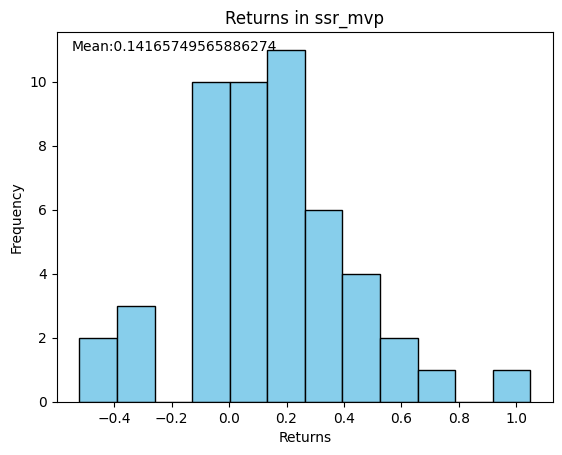

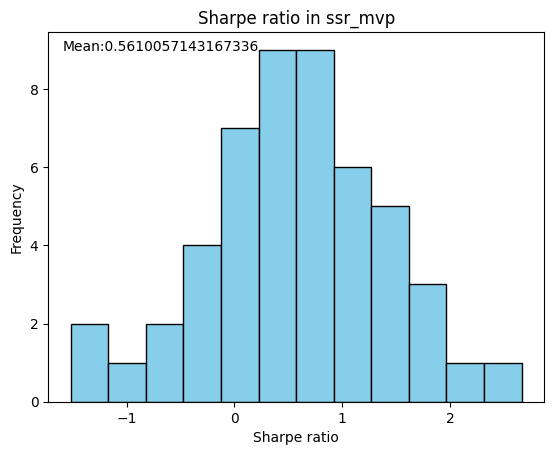

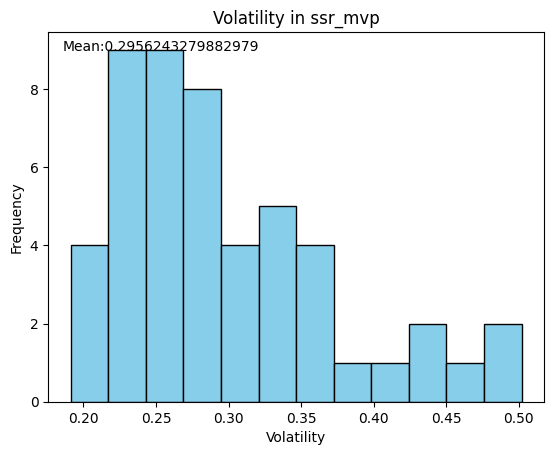

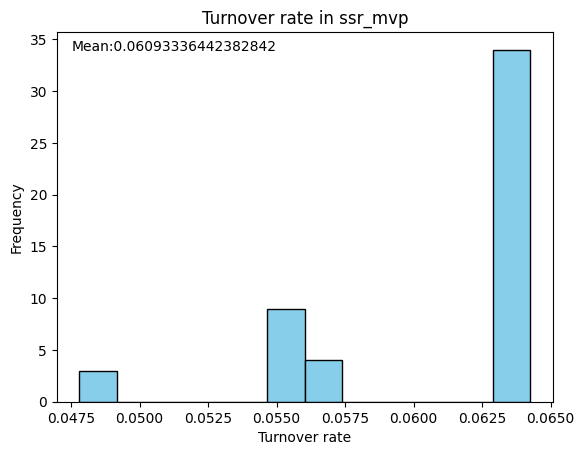

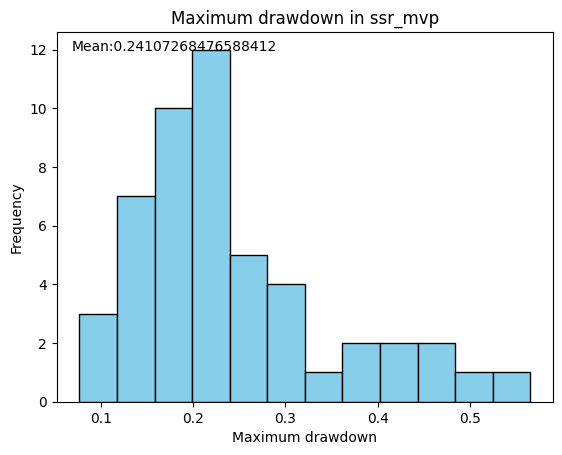

In [7]:
t=1 # Year
n=50 # Number of stocks
gf = GenericFunction(Stock_Data)
gf.set_disable_tqdm(True) # Optional

# Set gamma_square value
gf.gamma2 = 0.001

# Set aggregate method ("sample_mean" or "geo_median")
gf.aggregate_method = "geo_median"

# Set number of bootstraps
gf.boot_properties=1

# Set SSR properties
#gf.set_ssr_properties(50,round(n**0.7))
gf.set_ssr_properties(1,5)

# Set Ensemble properties
#gf.set_ensemble_properties(50,252,50,round(n**0.7))
gf.set_ensemble_properties(1,50,1,50)

# Set n day rebalance
gf.set_n_day_rebalance(31)

# Plot
gf.plot_random_time_random_stock("ssr_mvp",50,365,365,n,'helperData/stock_time_2024-04-03_00_22_28_915340.pickle',False)

In [8]:
database.get_table_data("Details")

,RunID,Method,Gamma2,AggregateMethod,N_Day_Rebalance,TrainStart,TrainEnd,TestEnd,Return,SharpeRatio,...,TurnoverRate,MaximumDrawdown,s,b,n_1,n_2,n_3,n_4,StocksCount,StocksLabel
0,Run1,SSR_mvp,0.001,sample_mean,31,2020-01-01,2022-12-31,2023-04-01,0.077544,1.667778,...,0.026560,0.101135,10,10,NA,NA,NA,NA,436,"['A', 'AAL', 'AAPL', 'ABT', 'ACGL', 'ACN', 'AD..."
1,Run2,SSR_mvp,0.001,sample_mean,31,2020-01-01,2022-12-31,2023-04-01,0.082710,1.725956,...,0.029508,0.059178,10,10,NA,NA,NA,NA,436,"['A', 'AAL', 'AAPL', 'ABT', 'ACGL', 'ACN', 'AD..."
2,Run3,SSR_mvp,0.001,sample_mean,31,2020-01-01,2022-12-31,2023-04-01,0.083569,1.680374,...,0.028081,0.117748,10,10,NA,NA,NA,NA,436,"['A', 'AAL', 'AAPL', 'ABT', 'ACGL', 'ACN', 'AD..."
3,Run4,SSR_mvp,0.001,sample_mean,31,2020-01-01,2022-12-31,2023-04-01,0.111039,1.950139,...,0.029508,0.093904,10,10,NA,NA,NA,NA,436,"['A', 'AAL', 'AAPL', 'ABT', 'ACGL', 'ACN', 'AD..."
4,Run5,SSR_mvp,0.001,sample_mean,31,2020-01-01,2022-12-31,2023-04-01,0.042884,0.983177,...,0.032787,0.087028,10,10,NA,NA,NA,NA,436,"['A', 'AAL', 'AAPL', 'ABT', 'ACGL', 'ACN', 'AD..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Run107,SSR_mvp,0.001,geo_median,31,2013-04-05,2014-04-05,2015-04-05,0.382436,1.233256,...,0.064257,0.223009,1,5,NA,NA,NA,NA,50,"['KDP', 'V', 'BSX', 'JCI', 'KO', 'CVX', 'WYNN'..."
107,Run108,SSR_mvp,0.001,geo_median,31,2014-01-26,2015-01-26,2016-01-26,-0.385552,-1.479152,...,0.063745,0.512972,1,5,NA,NA,NA,NA,50,"['L', 'BBY', 'BKR', 'AMT', 'IBM', 'EG', 'VZ', ..."
108,Run109,SSR_mvp,0.001,geo_median,31,2016-02-20,2017-02-19,2018-02-19,0.286317,1.610622,...,0.056000,0.094110,1,5,NA,NA,NA,NA,50,"['CSCO', 'SBUX', 'MU', 'CRM', 'EOG', 'LYV', 'T..."
109,Run110,SSR_mvp,0.001,geo_median,31,2020-09-30,2021-09-30,2022-09-30,-0.216440,-0.412699,...,0.063745,0.413044,1,5,NA,NA,NA,NA,50,"['MET', 'ITW', 'ADP', 'MDT', 'VRSN', 'MO', 'VL..."
